In [1]:
import bayesian_surprise3 as bs3

import json

from datetime import date, datetime
from urllib.request import urlopen
from random import choice, randint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
# the combine relative data
cr = pd.read_csv('./combRel.csv').drop(0).drop(3222).drop(3223).drop(['DATE_RANGE_START'], axis=1)
cr.FIPS = cr.FIPS.astype(int).astype(str).apply(lambda f: f.zfill(5))
# cr['state'] = cr.FIPS.apply(lambda f: f[:2])
cr = cr.set_index('FIPS')

pop = cr.POPN

acr = cr.div(cr.POPN, axis=0).drop('POPN', axis=1)

# cr = cr.drop('POPN', axis=1)

# cases
cases = pd.read_csv('../data/nyt-MA-cases20-22.csv')
cases.fips = cases.fips.astype(int).astype(str).apply(lambda f: f.zfill(5))
cases = cases.set_index('fips')
cases.where(cases > 0.0, 0.0, inplace=True)       # replaces where false

# deaths
deaths = pd.read_csv('../data/nyt-MA-deaths20-22.csv')
deaths.fips = deaths.fips.astype(int).astype(str).apply(lambda f: f.zfill(5))
deaths = deaths.set_index('fips')
deaths.where(deaths > 0.0, 0.0, inplace=True)

/tmp/ipykernel_454951/3855442618.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cases.columns, rotation=45)


[Text(0, 0, '2020/01'),
 Text(1, 0, '2020/02'),
 Text(2, 0, '2020/03'),
 Text(3, 0, '2020/04'),
 Text(4, 0, '2020/05'),
 Text(5, 0, '2020/06'),
 Text(6, 0, '2020/07'),
 Text(7, 0, '2020/08'),
 Text(8, 0, '2020/09'),
 Text(9, 0, '2020/10'),
 Text(10, 0, '2020/11'),
 Text(11, 0, '2020/12'),
 Text(12, 0, '2021/01'),
 Text(13, 0, '2021/02'),
 Text(14, 0, '2021/03'),
 Text(15, 0, '2021/04'),
 Text(16, 0, '2021/05'),
 Text(17, 0, '2021/06'),
 Text(18, 0, '2021/07'),
 Text(19, 0, '2021/08'),
 Text(20, 0, '2021/09'),
 Text(21, 0, '2021/10'),
 Text(22, 0, '2021/11'),
 Text(23, 0, '2021/12'),
 Text(24, 0, '2022/01'),
 Text(25, 0, '2022/02')]

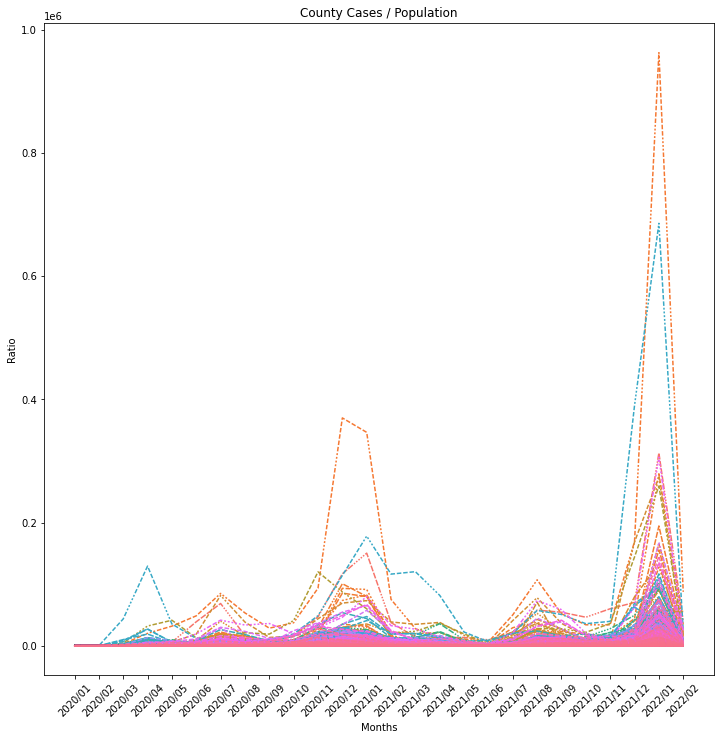

In [3]:
# sanity check - no <0.0

fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=cases.T, legend=False)

ax.set_title('County Cases / Population')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(cases.columns, rotation=45)

In [4]:
# sanity check

scale = lambda v: (v.values - np.min(v.values)) / (np.max(v.values) - np.min(v.values))

scale(cr.drop('POPN', axis=1).loc['01001'] / pop.loc['01001']) == scale(acr.loc['01001'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# County case / pop

In [5]:
# county case population
ccp = cases.div(pop, axis=0)
ccp

,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
01001,0.0,0.0,0.000125,0.000623,0.003188,0.005628,0.008514,0.007605,0.006216,0.006554,...,0.004239,0.002048,0.004987,0.021747,0.017562,0.009048,0.004880,0.008763,0.066328,0.007356
01003,0.0,0.0,0.000083,0.000676,0.000506,0.001701,0.010559,0.006298,0.004776,0.005670,...,0.002961,0.001775,0.013869,0.034380,0.014641,0.004217,0.003009,0.007881,0.055555,0.006778
01005,0.0,0.0,0.000000,0.001586,0.005206,0.006426,0.011103,0.006466,0.005653,0.006670,...,0.001383,0.000488,0.006507,0.022530,0.017487,0.004514,0.003986,0.006548,0.057058,0.005206
01007,0.0,0.0,0.000136,0.001762,0.001491,0.004292,0.008719,0.008628,0.004969,0.009442,...,0.003162,0.001310,0.009216,0.026292,0.029454,0.006686,0.002982,0.008493,0.071106,0.007951
01009,0.0,0.0,0.000086,0.000553,0.000432,0.002523,0.009658,0.008984,0.005909,0.007688,...,0.004337,0.002125,0.006306,0.021476,0.021130,0.010159,0.005581,0.009105,0.048377,0.007550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_454951/2036600721.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ccp.columns, rotation=45)


[Text(0, 0, '2020/01'),
 Text(1, 0, '2020/02'),
 Text(2, 0, '2020/03'),
 Text(3, 0, '2020/04'),
 Text(4, 0, '2020/05'),
 Text(5, 0, '2020/06'),
 Text(6, 0, '2020/07'),
 Text(7, 0, '2020/08'),
 Text(8, 0, '2020/09'),
 Text(9, 0, '2020/10'),
 Text(10, 0, '2020/11'),
 Text(11, 0, '2020/12'),
 Text(12, 0, '2021/01'),
 Text(13, 0, '2021/02'),
 Text(14, 0, '2021/03'),
 Text(15, 0, '2021/04'),
 Text(16, 0, '2021/05'),
 Text(17, 0, '2021/06'),
 Text(18, 0, '2021/07'),
 Text(19, 0, '2021/08'),
 Text(20, 0, '2021/09'),
 Text(21, 0, '2021/10'),
 Text(22, 0, '2021/11'),
 Text(23, 0, '2021/12'),
 Text(24, 0, '2022/01'),
 Text(25, 0, '2022/02')]

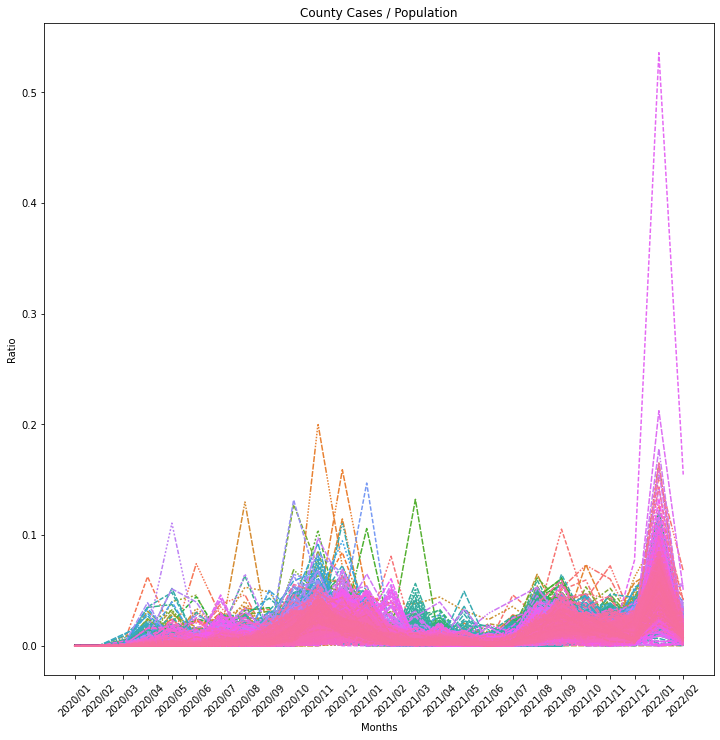

In [6]:
fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=ccp.T, legend=False)

ax.set_title('County Cases / Population')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(ccp.columns, rotation=45)

In [7]:
ccp.to_csv('./county-data/county_cases-population.csv', index=True)

# County Deaths / Population

In [23]:
# county deaths population
cdp = deaths.div(pop, axis=0)
cdp

,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,2020/09,2020/10,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
01001,0.0,0.0,0.0,0.000071,0.000000,0.000142,0.000160,0.000036,0.000071,0.000071,...,0.000053,0.000053,0.000018,0.000071,0.000392,0.000142,0.000160,0.000053,0.000107,0.000125
01003,0.0,0.0,0.0,0.000013,0.000026,0.000004,0.000052,0.000087,0.000044,0.000083,...,0.000026,0.000017,0.000061,0.000244,0.000541,0.000201,0.000148,0.000017,0.000083,0.000061
01005,0.0,0.0,0.0,0.000041,0.000000,0.000000,0.000163,0.000081,0.000000,0.000081,...,0.000122,0.000041,0.000041,0.000163,0.000244,0.000203,0.000163,0.000041,0.000122,0.000122
01007,0.0,0.0,0.0,0.000000,0.000045,0.000000,0.000045,0.000271,0.000136,0.000181,...,0.000045,0.000000,0.000045,0.000361,0.000452,0.000181,0.000316,0.000045,0.000045,0.000045
01009,0.0,0.0,0.0,0.000000,0.000017,0.000000,0.000035,0.000138,0.000069,0.000173,...,0.000069,0.000000,0.000000,0.000104,0.000259,0.000311,0.000242,0.000104,0.000155,0.000086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_454951/509054202.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cdp.columns, rotation=45)


[Text(0, 0, '2020/01'),
 Text(1, 0, '2020/02'),
 Text(2, 0, '2020/03'),
 Text(3, 0, '2020/04'),
 Text(4, 0, '2020/05'),
 Text(5, 0, '2020/06'),
 Text(6, 0, '2020/07'),
 Text(7, 0, '2020/08'),
 Text(8, 0, '2020/09'),
 Text(9, 0, '2020/10'),
 Text(10, 0, '2020/11'),
 Text(11, 0, '2020/12'),
 Text(12, 0, '2021/01'),
 Text(13, 0, '2021/02'),
 Text(14, 0, '2021/03'),
 Text(15, 0, '2021/04'),
 Text(16, 0, '2021/05'),
 Text(17, 0, '2021/06'),
 Text(18, 0, '2021/07'),
 Text(19, 0, '2021/08'),
 Text(20, 0, '2021/09'),
 Text(21, 0, '2021/10'),
 Text(22, 0, '2021/11'),
 Text(23, 0, '2021/12'),
 Text(24, 0, '2022/01'),
 Text(25, 0, '2022/02')]

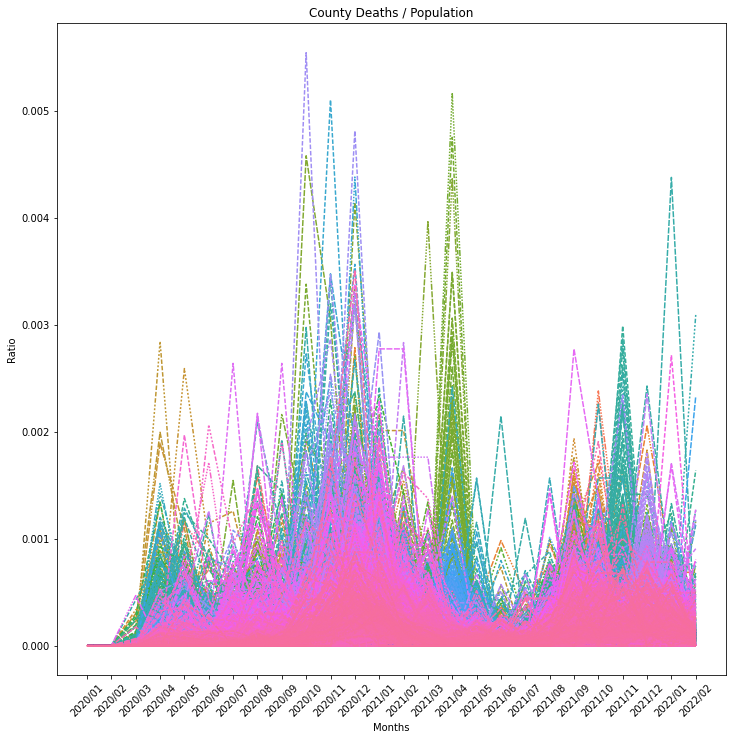

In [24]:
fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=cdp.T, legend=False)

ax.set_title('County Deaths / Population')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(cdp.columns, rotation=45)

In [25]:
cdp.to_csv('./county-data/county_deaths-population.csv', index=True)

# County Traffic / pop

In [11]:
acr

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110
FIPS,,,,,,,,,,,,,,,,,,,,,
01001,9.871689,9.527402,8.238810,5.301220,7.827767,8.424846,8.654787,8.663621,8.479081,9.220251,...,8.279865,8.289821,10.560477,10.554689,10.848891,10.110767,10.464939,10.307329,10.092564,11.110126
01003,6.921897,6.874293,6.414668,3.149149,8.444700,10.680767,11.599620,8.470328,6.183691,6.673113,...,6.006642,5.880940,9.915194,9.194669,10.438695,11.569893,13.244676,8.748477,7.916053,8.444779
01005,4.497743,4.159258,3.763797,2.640083,3.566635,3.889747,3.978364,3.956078,3.892879,4.130343,...,3.527634,3.617146,4.553052,4.869616,4.867054,4.569116,4.600594,4.450242,4.668226,4.805238
01007,10.303216,9.490558,8.211240,5.552945,6.924512,7.495934,7.484731,8.461059,9.000723,9.396910,...,8.179391,8.543775,10.429075,11.025027,10.450081,8.966570,8.717022,10.790793,11.398536,12.217158
01009,13.311149,12.697922,11.281156,8.168092,10.928731,11.624147,12.001745,12.145528,12.091069,12.893416,...,11.643774,11.654486,14.678070,15.323986,15.540179,13.631784,13.833670,14.493979,14.622834,15.520448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_454951/226695088.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(acr.columns, rotation=45)


[Text(0, 0, '202001'),
 Text(1, 0, '202002'),
 Text(2, 0, '202003'),
 Text(3, 0, '202004'),
 Text(4, 0, '202005'),
 Text(5, 0, '202006'),
 Text(6, 0, '202007'),
 Text(7, 0, '202008'),
 Text(8, 0, '202009'),
 Text(9, 0, '202010'),
 Text(10, 0, '202011'),
 Text(11, 0, '202012'),
 Text(12, 0, '202101'),
 Text(13, 0, '202102'),
 Text(14, 0, '202103'),
 Text(15, 0, '202104'),
 Text(16, 0, '202105'),
 Text(17, 0, '202106'),
 Text(18, 0, '202107'),
 Text(19, 0, '202108'),
 Text(20, 0, '202109'),
 Text(21, 0, '202110')]

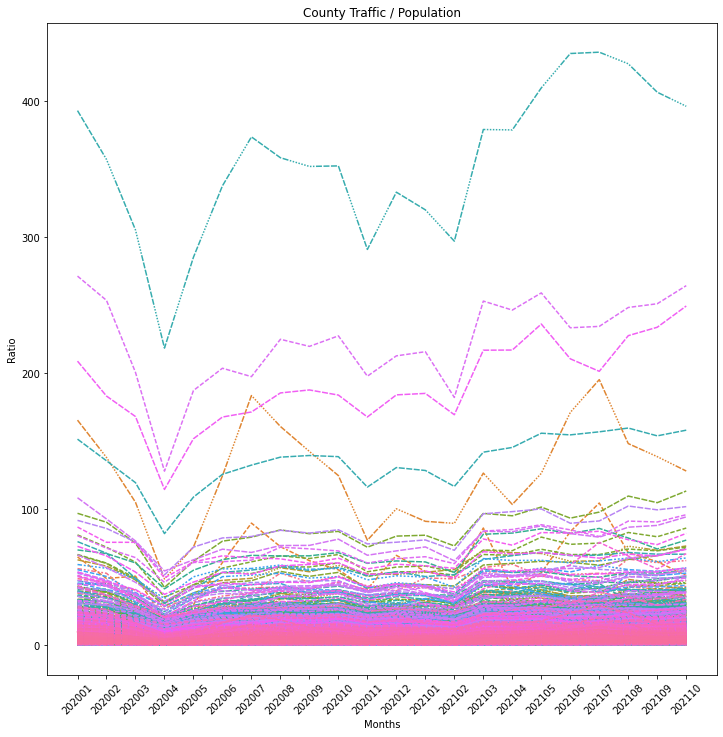

In [12]:
fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=acr.T, legend=False)

ax.set_title('County Traffic / Population')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(acr.columns, rotation=45)

In [14]:
acr.to_csv('./county-data/county_traffic-population.csv')

# County Case / Traffic

In [15]:
cases_ = cases[['2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
       '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12',
       '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06',
       '2021/07', '2021/08', '2021/09', '2021/10']]
cases_.columns = cr.drop('POPN', axis=1).columns

cct = cases_.div(cr.drop('POPN', axis=1), axis=0)
cct

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110
01001,0.0,0.0,0.000015,0.000118,0.000407,0.000668,0.000984,0.000878,0.000733,0.000711,...,0.003182,0.001278,0.000548,0.000532,0.000391,0.000203,0.000477,0.002110,0.001740,0.000814
01003,0.0,0.0,0.000013,0.000215,0.000060,0.000159,0.000910,0.000744,0.000772,0.000850,...,0.003286,0.001191,0.000340,0.000207,0.000284,0.000153,0.001047,0.003930,0.001850,0.000499
01005,0.0,0.0,0.000000,0.000601,0.001460,0.001652,0.002791,0.001635,0.001452,0.001615,...,0.005038,0.001844,0.001000,0.000610,0.000284,0.000107,0.001414,0.005063,0.003746,0.000939
01007,0.0,0.0,0.000017,0.000317,0.000215,0.000573,0.001165,0.001020,0.000552,0.001005,...,0.002612,0.000756,0.000399,0.000213,0.000303,0.000146,0.001057,0.002437,0.002584,0.000547
01009,0.0,0.0,0.000008,0.000068,0.000040,0.000217,0.000805,0.000740,0.000489,0.000596,...,0.001591,0.000569,0.000408,0.000191,0.000279,0.000156,0.000456,0.001482,0.001445,0.000655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_454951/3450113629.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cct.columns, rotation=45)


[Text(0, 0, '202001'),
 Text(1, 0, '202002'),
 Text(2, 0, '202003'),
 Text(3, 0, '202004'),
 Text(4, 0, '202005'),
 Text(5, 0, '202006'),
 Text(6, 0, '202007'),
 Text(7, 0, '202008'),
 Text(8, 0, '202009'),
 Text(9, 0, '202010'),
 Text(10, 0, '202011'),
 Text(11, 0, '202012'),
 Text(12, 0, '202101'),
 Text(13, 0, '202102'),
 Text(14, 0, '202103'),
 Text(15, 0, '202104'),
 Text(16, 0, '202105'),
 Text(17, 0, '202106'),
 Text(18, 0, '202107'),
 Text(19, 0, '202108'),
 Text(20, 0, '202109'),
 Text(21, 0, '202110')]

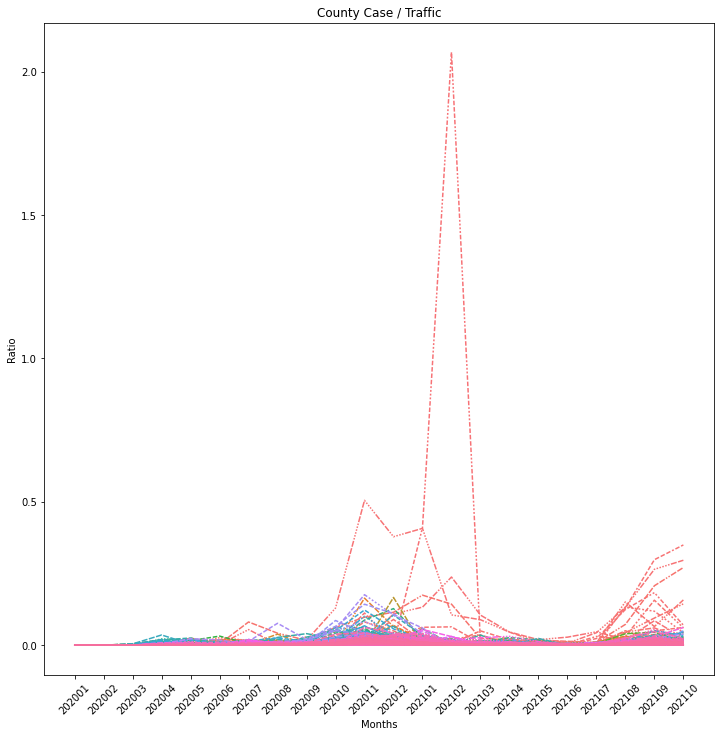

In [16]:
fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=cct.T, legend=False)

ax.set_title('County Case / Traffic')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(cct.columns, rotation=45)

In [18]:
cct.to_csv('./county-data/county_cases-traffic.csv', index=True)

# County Deaths / traffic

In [19]:
deaths_ = deaths[['2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
       '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12',
       '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06',
       '2021/07', '2021/08', '2021/09', '2021/10']]
deaths_.columns = cr.drop('POPN', axis=1).columns

cdt = deaths_.div(cr.drop('POPN', axis=1), axis=0)
cdt

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110
01001,0.0,0.0,0.0,0.000013,0.000000,1.691285e-05,0.000019,0.000004,0.000008,0.000008,...,0.000045,0.000047,0.000013,0.000013,0.000005,0.000005,0.000002,0.000007,0.000039,0.000013
01003,0.0,0.0,0.0,0.000004,0.000003,4.083364e-07,0.000005,0.000010,0.000007,0.000012,...,0.000046,0.000044,0.000008,0.000002,0.000003,0.000002,0.000005,0.000028,0.000068,0.000024
01005,0.0,0.0,0.0,0.000015,0.000000,0.000000e+00,0.000041,0.000021,0.000000,0.000020,...,0.000092,0.000124,0.000036,0.000008,0.000025,0.000009,0.000009,0.000037,0.000052,0.000042
01007,0.0,0.0,0.0,0.000000,0.000007,0.000000e+00,0.000006,0.000032,0.000015,0.000019,...,0.000033,0.000042,0.000000,0.000020,0.000004,0.000000,0.000005,0.000033,0.000040,0.000015
01009,0.0,0.0,0.0,0.000000,0.000002,0.000000e+00,0.000003,0.000011,0.000006,0.000013,...,0.000055,0.000040,0.000005,0.000005,0.000004,0.000000,0.000000,0.000007,0.000018,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_454951/4198418674.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cdt.columns, rotation=45)


[Text(0, 0, '202001'),
 Text(1, 0, '202002'),
 Text(2, 0, '202003'),
 Text(3, 0, '202004'),
 Text(4, 0, '202005'),
 Text(5, 0, '202006'),
 Text(6, 0, '202007'),
 Text(7, 0, '202008'),
 Text(8, 0, '202009'),
 Text(9, 0, '202010'),
 Text(10, 0, '202011'),
 Text(11, 0, '202012'),
 Text(12, 0, '202101'),
 Text(13, 0, '202102'),
 Text(14, 0, '202103'),
 Text(15, 0, '202104'),
 Text(16, 0, '202105'),
 Text(17, 0, '202106'),
 Text(18, 0, '202107'),
 Text(19, 0, '202108'),
 Text(20, 0, '202109'),
 Text(21, 0, '202110')]

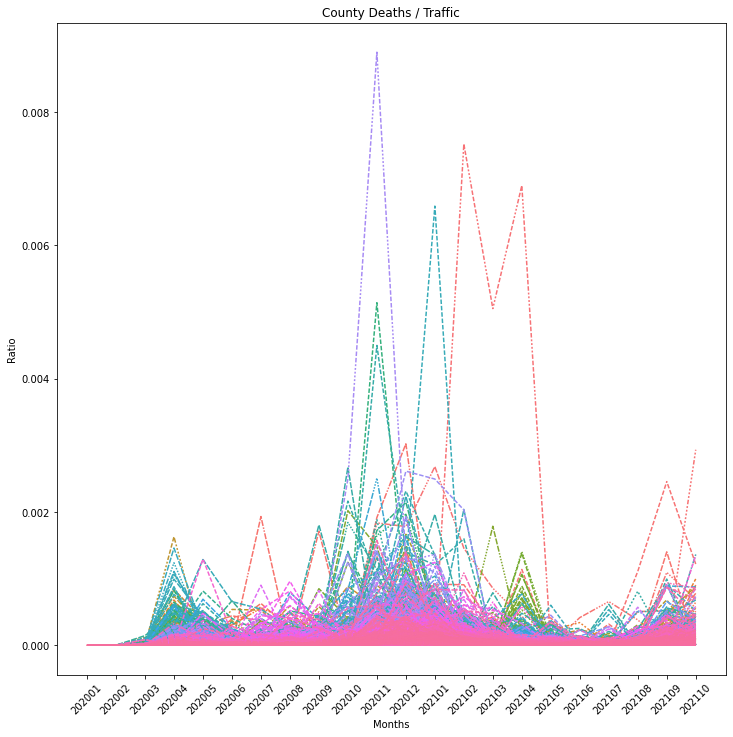

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 12))

sns.lineplot(data=cdt.T, legend=False)

ax.set_title('County Deaths / Traffic')
ax.set_xlabel('Months')
ax.set_ylabel('Ratio')

ax.set_xticklabels(cdt.columns, rotation=45)

In [22]:
cdt.to_csv('./county-data/county_deaths-traffic.csv', index=True)